In [315]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from itertools import combinations 
from tqdm import tqdm_notebook as tqdm
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from datetime import datetime

plt.rcParams['figure.figsize'] = [12, 12]

In [292]:
#!pip install dtw-python

In [60]:
os.chdir("D:\\FIU\\COP 5610\\Project\\")

In [61]:
historical_stock_prices_df = pd.read_csv("historical_stock_prices.csv")
historical_stocks_df = pd.read_csv("historical_stocks.csv")

In [326]:
historical_stock_prices_df

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14
...,...,...,...,...,...,...,...,...
20973884,NZF,14.60,14.59,14.590000,14.58,14.62,137500,2018-08-20
20973885,NZF,14.60,14.58,14.580000,14.57,14.61,151200,2018-08-21
20973886,NZF,14.58,14.59,14.590000,14.57,14.63,185400,2018-08-22
20973887,NZF,14.60,14.57,14.570000,14.57,14.64,135600,2018-08-23


In [62]:
companies = historical_stock_prices_df.ticker.unique()
companies.sort()
#print(" ".join(companies))

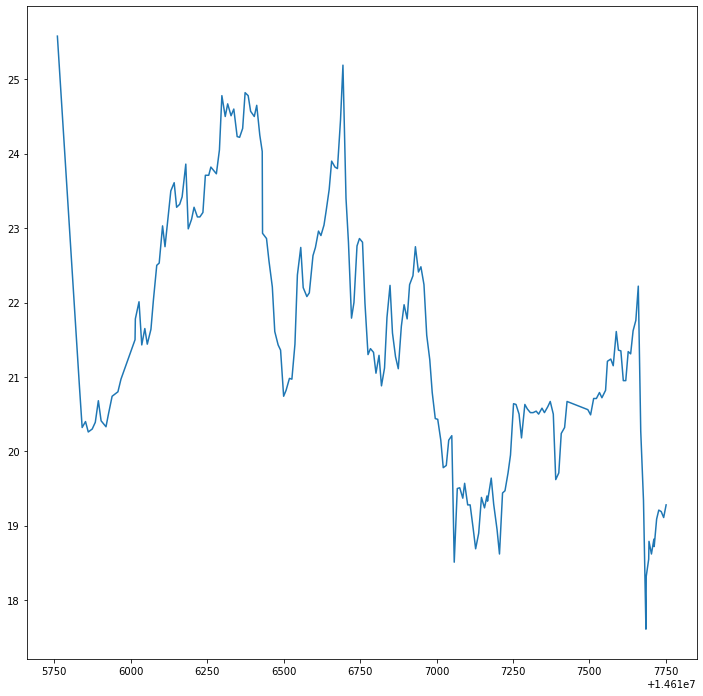

In [380]:
historical_stock_prices_df[historical_stock_prices_df["ticker"]=='AQUA']["adj_close"].plot()
plt.show()

In [64]:
dist_array = np.zeros((len(companies),len(companies)))

In [65]:
pairs = [i for i in combinations(range(len(companies)),2)]

In [66]:
#taking data from 2017-01-01 to 2017-12-31 and preidicting prices for 2018
stocks = historical_stock_prices_df.loc[(historical_stock_prices_df['date']>='2017-01-01') & (historical_stock_prices_df['date']<='2017-12-31')]

In [72]:
series_df = []
removable_companies=[]
for i in tqdm(range(len(companies))):
    series1 = np.array(stocks[stocks["ticker"]==companies[i]]["adj_close"])
    if len(series1)==0:
        removable_companies.append(companies[i])
        continue
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(series1.reshape(-1,1))
    series1_normalized = scaler.transform(series1.reshape(-1,1))
    series_df.append(series1_normalized)

C:\Users\Tanvir\Anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [341]:
array_l=[]
for i in series_df:
    array_l.append(len(i))
for i in array_l:
    print(i,end=" ")

251 251 251 251 230 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 92 251 251 251 251 251 249 251 251 251 251 40 251 251 251 251 251 251 251 251 250 12 251 251 251 251 251 251 251 251 251 251 251 251 251 251 138 251 205 248 251 251 214 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 247 251 251 251 250 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 95 197 251 251 251 251 16 251 251 251 241 251 251 251 124 250 251 251 251 232 251 251 251 251 251 251 249 251 249 251 251 251 170 251 251 251 251 251 251 251 251 118 251 251 251 251 251 248 240 251 251 251 251 251 250 251 251 251 251 251 251 251 251 251 251 251 251 251 40 251 243 251 251 251 128 251 251 156 41 247 251 251 251 251 251 251 251 251 251 251 61 251 251 251 251 251 251 136 251 251 167 251 251 251 251 251 251 251 250 251 251 

 251 251 13 251 251 10 251 251 248 251 251 251 251 251 251 251 251 251 251 250 251 6 251 251 251 250 251 11 251 251 219 251 251 251 251 245 251 251 251 251 251 250 251 209 251 251 251 251 251 237 251 251 251 201 251 197 251 251 251 251 251 251 251 251 41 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 236 251 251 251 251 31 251 142 251 251 251 249 48 251 251 251 251 251 49 251 251 251 251 251 251 251 251 251 251 6 251 251 251 251 251 251 251 49 251 251 251 251 251 251 251 251 77 105 251 251 232 251 251 251 251 251 251 251 38 251 251 251 251 251 251 251 183 72 251 251 232 251 30 251 251 44 91 251 227 240 251 251 251 251 251 251 251 36 251 251 251 180 251 251 251 251 251 251 251 9 251 251 251 251 251 251 232 232 251 251 50 251 251 251 251 246 251 222 248 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 151 251 251 251 249 251 229 251 251 251 251 251 83 251 238 251 251 233 241 251 251 250 251 251 251 251 251 251 251 251 251 251 251 251 251 251 128 251 251 251 25

 251 251 251 251 251 251 251 251 251 251 251 251 248 251 251 251 251 251 251 251 251 251 251 251 185 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 195 251 160 251 242 245 251 251 251 241 251 251 251 126 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 156 251 251 249 251 251 251 251 251 251 251 152 251 251 251 251 251 251 251 249 251 251 251 251 251 251 251 81 251 251 186 237 251 251 251 251 251 251 251 251 251 251 251 251 251 251 131 251 251 251 251 147 9 99 251 251 251 251 251 251 251 237 251 251 251 251 194 243 251 251 58 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 251 171 251 251 251 251 238 251 251 238 215 251 181 251 249 251 248 32 251 100 251 251 251 251 249 251 250 251 251 251 251 251 251 251 251 231 251 100 251 251 251 251 251 251 251 251 251 251 83 71 251 251 249 251 251 251 251 251 251 171 251 

In [73]:
#companies that had data in the given date range
remaining_companies = []
for i in companies:
    if i not in removable_companies:
        remaining_companies.append(i)

In [78]:
pairs = [i for i in combinations(range(len(remaining_companies)),2)]
dist_array = np.zeros((len(remaining_companies),len(remaining_companies)))

In [99]:
#calculating pair-wise distance using Dynamic Time Warping(DTW) algorithm
for pair in tqdm(pairs):
    i = pair[0]
    j = pair[1]
    series1_normalized = series_df[i]
    series2_normalized = series_df[j]
    alignment = dtw(series1_normalized, series2_normalized, keep_internals=True)
    dist_array[i][j] = alignment.distance
    dist_array[j][i] = alignment.distance

C:\Users\Tanvir\Anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


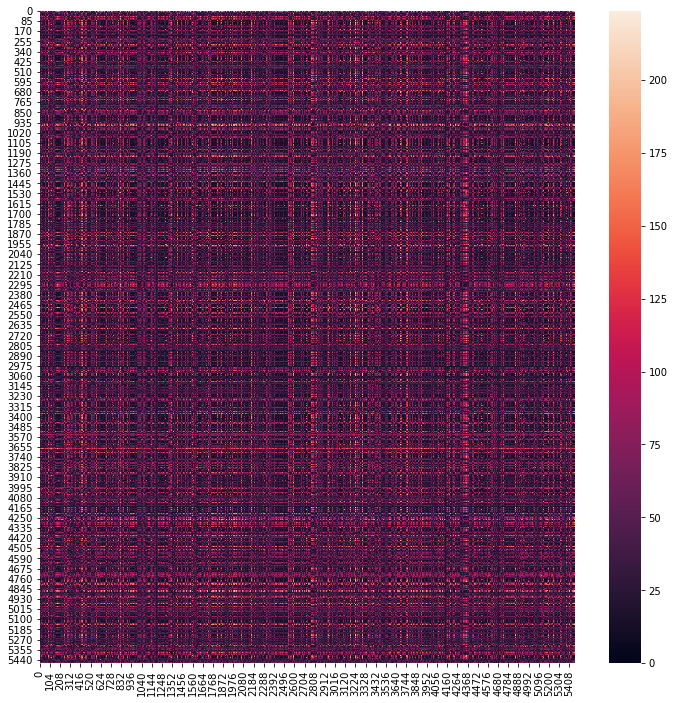

In [102]:
#heatmap of the pair-wise distance matrix
ax = sns.heatmap(dist_array)

In [104]:
normed_dist_matrix = normalize(dist_array, axis=1, norm='l2')

In [110]:
#hierarchical clustering when number of cluster is predefined to be 2
model = AgglomerativeClustering(affinity='precomputed', n_clusters=2, linkage='complete').fit(normed_dist_matrix)
labels = model.labels_

In [232]:
clusters=[[],[]]
for i in range(len(remaining_companies)):
    clusters[labels[i]].append(remaining_companies[i])

In [296]:
print("first cluster")
print("----------------")
print(" ".join(clusters[0]))

first cluster
----------------
A AA AABA AAL AAN AAOI AAON AAPL AAWW AAXJ AAXN AB ABAC ABAX ABB ABBV ABC ABCB ABCD ABEO ABEV ABG ABM ABMD ABR ABT ABTX ABUS ABX AC ACAD ACCO ACER ACGL ACGLO ACGLP ACH ACHC ACHN ACIU ACIW ACLS ACM ACN ACNB ACOR ACP ACRE ACRS ACRX ACSF ACST ACWI ACWX ACXM ADAP ADBE ADC ADES ADI ADMP ADMS ADNT ADOM ADP ADRA ADRD ADRE ADRO ADRU ADS ADSK ADSW ADTN ADUS ADVM ADX AEB AED AEE AEG AEGN AEH AEHR AEIS AEL AEM AEO AEP AER AERI AES AET AETI AEY AEZS AFB AFC AFG AFGE AFGH AFH AFL AFMD AFSS AFST AFT AGC AGCO AGD AGEN AGFS AGI AGIO AGLE AGM AGNC AGNCB AGND AGO AGR AGRO AGRX AGYS AGZD AHH AHPA AHPI AHT AIA AIC AIF AIG AIMC AIMT AIN AINV AIR AIRR AIT AIV AIW AIY AIZ AJG AJRD AJX AKAM AKAO AKBA AKCA AKP AKRX AKTS AKTX AL ALB ALBO ALCO ALDX ALE ALEX ALG ALGN ALGT ALIM ALKS ALL ALLE ALLT ALLY ALNA ALNY ALOT ALPN ALRM ALRN ALSK ALSN ALT ALTY ALV ALX ALXN AM AMAT AMBA AMBR AMCA AMCX AMD AME AMED AMEH AMG AMGN AMH AMID AMKR AMN AMNB AMOT AMOV AMP AMPH AMR AMRC AMRK AMRN AMSF AM

In [343]:
len(clusters[1])

1151

In [297]:
print("second cluster")
print("----------------")
print(" ".join(clusters[1]))

second cluster
----------------
AAME AAP AAT AAV ABDC ABIL ABIO ACBI ACC ACET ACHV ACIA ACMR ACT ACTG ADM ADMA ADXS AEMD AFI AFSI AG AGN AGNCN AGS AGTC AGX AHC AHL AI AIPT AIRG AKER AKR AKS ALDR ALJJ ALK ALQA ALTR AMAG AMBC AMC AMCN AMDA AMGP AMMA AMRH AMRS AMSC AMTX ANCB ANDE ANDX ANTH ANW ANY AOBC AOI AOSL APA APC APEN APOG APRN AQMS AQUA AQXP AR ARA ARC ARCT ARCW ARDX ARLZ AROC ASFI ASNA ASTC ASTE ATAC ATKR ATLO ATNI ATOS ATUS ATXI AU AUTO AVGR AVP AVT AVYA AWRE AXS AYI AYTU AZRE AZZ BAND BAS BBBY BBOX BBW BCAC BCEI BCOM BCS BGFV BGS BH BHGE BHR BIOL BIS BKD BKEP BKI BKNG BKS BKSC BLCM BMLP BNED BOJA BOXL BPL BPMP BPOP BPTH BRAC BRPA BRPAR BRPAU BRQS BRS BRX BSPM BSQR BSTC BSTI BT BTE BW BWP BXE BXG CAKE CART CASA CASM CATB CATM CATO CBA CBK CBL CBO CBPO CBU CCIH CCLP CCM CCRN CDE CDOR CDTX CECE CELP CEM CEN CETX CFBI CFFN CFMS CFRX CGEN CGG CHFS CHK CHKE CHRS CHS CIA CIC CINR CIR CJJD CKH CKPT CLDC CLDR CLDX CLFD CLI CLNE CLPR CLRO CLSN CLW CMG CMSS CNFR CNK CNNE CNSL CNXM COCP COD

In [256]:
#name of the companies in the first cluster
for i in historical_stocks_df[historical_stocks_df.ticker.isin(clusters[0])].name.values:
    print(i)

1347 PROPERTY INSURANCE HOLDINGS, INC.
180 DEGREE CAPITAL CORP.
1-800 FLOWERS.COM, INC.
1ST CONSTITUTION BANCORP (NJ)
1ST SOURCE CORPORATION
21VIANET GROUP, INC.
2U, INC.
51JOB, INC.
A V HOMES, INC.
A. SCHULMAN, INC.
AAON, INC.
ABAXIS, INC.
ABEONA THERAPEUTICS INC.
ABIOMED, INC.
ABRAXAS PETROLEUM CORPORATION
AC IMMUNE SA
ACADIA HEALTHCARE COMPANY, INC.
ACADIA PHARMACEUTICALS INC.
ACASTI PHARMA, INC.
ACCELERATE DIAGNOSTICS, INC.
ACCELERON PHARMA INC.
ACCESS NATIONAL CORPORATION
ACCURAY INCORPORATED
ACELRX PHARMACEUTICALS, INC.
ACER THERAPEUTICS INC.
ACHAOGEN, INC.
ACHILLION PHARMACEUTICALS, INC.
ACI WORLDWIDE, INC.
ACLARIS THERAPEUTICS, INC.
ACNB CORPORATION
ACORDA THERAPEUTICS, INC.
ACTIVE ALTS CONTRARIAN ETF
ACTIVISION BLIZZARD, INC
ACXIOM CORPORATION
ADAMAS PHARMACEUTICALS, INC.
ADAMIS PHARMACEUTICALS CORPORATION
ADAPTIMMUNE THERAPEUTICS PLC
ADDUS HOMECARE CORPORATION
ADDVANTAGE TECHNOLOGIES GROUP, INC.
ADESTO TECHNOLOGIES CORPORATION
ADOBE SYSTEMS INCORPORATED
ADOMANI, INC.
ADTRAN, 

BLACKROCK MUNIHOLDINGS NEW YORK QUALITY FUND, INC.
BLACKROCK MUNIHOLDINGS QUALITY FUND II, INC.
BLACKROCK MUNIHOLDINGS QUALITY FUND, INC.
BLACKROCK MUNIVEST FUND II, INC.
BLACKROCK MUNIYIELD CALIFORNIA FUND, INC.
BLACKROCK MUNIYIELD CALIFORNIA INSURED FUND, INC.
BLACKROCK MUNIYIELD FUND, INC.
BLACKROCK MUNIYIELD INVESTMENT FUND
BLACKROCK MUNIYIELD INVESTMENT QUALITYFUND
BLACKROCK MUNIYIELD MICHIGAN QUALITY FUND, INC.
BLACKROCK MUNIYIELD NEW JERSEY FUND, INC.
BLACKROCK MUNIYIELD NEW YORK QUALITY FUND, INC.
BLACKROCK MUNIYIELD PENNSYLVANIA QUALITY FUND
BLACKROCK MUNIYIELD QUALITY FUND II, INC.
BLACKROCK MUNIYIELD QUALITY FUND III, INC.
BLACKROCK MUNIYIELD QUALITY FUND, INC.
BLACKROCK NEW YORK INVESTMENT QUALITY MUNICIPAL TRUST INC. (TH
BLACKROCK NEW YORK MUNICIPAL 2018 TERM TRUST
BLACKROCK NEW YORK MUNICIPAL BOND TRUST
BLACKROCK NEW YORK MUNICIPAL INCOME QUALITY TRUST
BLACKROCK RESOURCES
BLACKROCK SCIENCE AND TECHNOLOGY TRUST
BLACKROCK STRATEGIC MUNICIPAL TRUST INC. (THE)
BLACKROCK UTILI

In [257]:
#name of the companies in the second cluster
for i in historical_stocks_df[historical_stocks_df.ticker.isin(clusters[1])].name.values:
    print(i)

ABILITY INC.
ACACIA COMMUNICATIONS, INC.
ACACIA RESEARCH CORPORATION
ACETO CORPORATION
ACHIEVE LIFE SCIENCES, INC.
ACM RESEARCH, INC.
ADMA BIOLOGICS INC
ADVAXIS, INC.
ADVISORSHARES VICE ETF
AEMETIS, INC
AETHLON MEDICAL, INC.
AEVI GENOMIC MEDICINE, INC.
AGNC INVESTMENT CORP.
AIRGAIN, INC.
AIRMEDIA GROUP INC
AKERS BIOSCIENCES INC
ALCENTRA CAPITAL CORP.
ALDER BIOPHARMACEUTICALS, INC.
ALJ REGIONAL HOLDINGS, INC.
ALLIANCE MMA, INC.
ALLIQUA BIOMEDICAL, INC.
ALPHA AND OMEGA SEMICONDUCTOR LIMITED
ALTAIR ENGINEERING INC.
AMAG PHARMACEUTICALS, INC.
AMBAC FINANCIAL GROUP, INC.
AMEDICA CORPORATION
AMERI HOLDINGS, INC.
AMERICAN OUTDOOR BRANDS CORPORATION
AMERICAN SUPERCONDUCTOR CORPORATION
AMES NATIONAL CORPORATION
AMTRUST FINANCIAL SERVICES, INC.
AMYRIS, INC.
ANCHOR BANCORP
ANTHERA PHARMACEUTICALS, INC.
APOGEE ENTERPRISES, INC.
APOLLO ENDOSURGERY, INC.
APPLIED GENETIC TECHNOLOGIES CORPORATION
AQUA METALS, INC.
AQUINOX PHARMACEUTICALS, INC.
ARALEZ PHARMACEUTICALS INC.
ARC GROUP WORLDWIDE, INC.
ARCA

In [299]:
#this calculates the average distance of a particular company and all other companies in a cluster.
#It proves that a particular company has relatively smaller distance with the companies belonging to the same cluster
#than the companies from the another cluster

chosen_ticker='RAVE'
avg_dist=0
for i in range(len(clusters[0])):
    avg_dist += (dist_array[remaining_companies.index(chosen_ticker)][remaining_companies.index(clusters[0][i])])
avg_dist /= len(clusters[0])
print("avg distance from cluster 1:",avg_dist)
avg_dist=0
for i in range(len(clusters[1])):
    avg_dist += (dist_array[remaining_companies.index(chosen_ticker)][remaining_companies.index(clusters[1][i])])
avg_dist /= len(clusters[1])
print("avg distance from cluster 2:",avg_dist)

avg distance from cluster 1: 75.65130483477718
avg distance from cluster 2: 23.780791462583725


In [281]:
#this is another hierarchical clustering without the predefined number of clusters
#just to plot the dendogram

model_2 = AgglomerativeClustering(affinity='precomputed', n_clusters=None, distance_threshold=0,linkage='complete').fit(normed_dist_matrix)

In [283]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

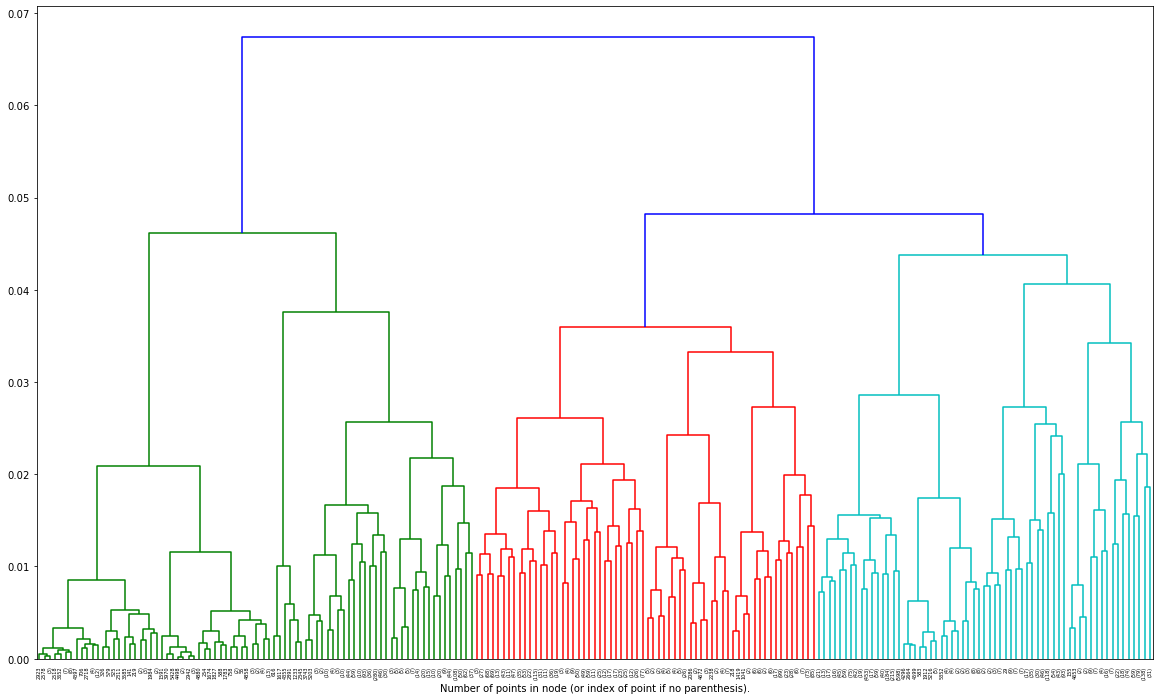

In [304]:
tree_height = 7
plt.rcParams['figure.figsize'] = [20, 12]
plot_dendrogram(model_2, truncate_mode='level', p=tree_height)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [347]:
labels_dendrogram = model_2.labels_

5470

In [354]:
#choosing different distant_threshold will lead to different clusters. for example using 0.03 lead to 10 clusters.
model_3 = AgglomerativeClustering(affinity='precomputed', n_clusters=None, distance_threshold=0.03,linkage='complete').fit(normed_dist_matrix)

In [355]:
#total unique labels of clusters
set(list(model_3.labels_))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [359]:
new_clusters=[]
for i in range(len(set(list(model_3.labels_)))):
    new_clusters.append([])
    
for i in range(len(list(model_3.labels_))):
    new_clusters[list(model_3.labels_)[i]].append(remaining_companies[i])

In [395]:
len(new_clusters[2])

474

AAON


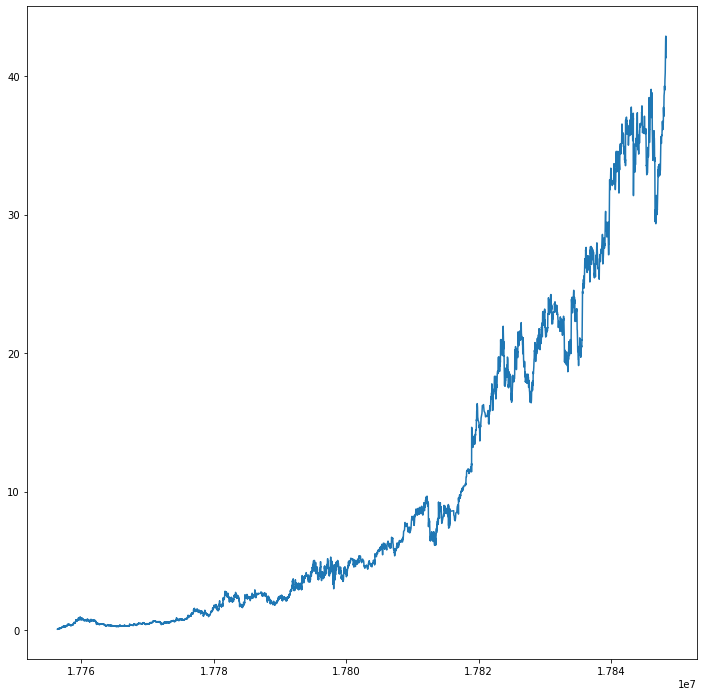

ABAX


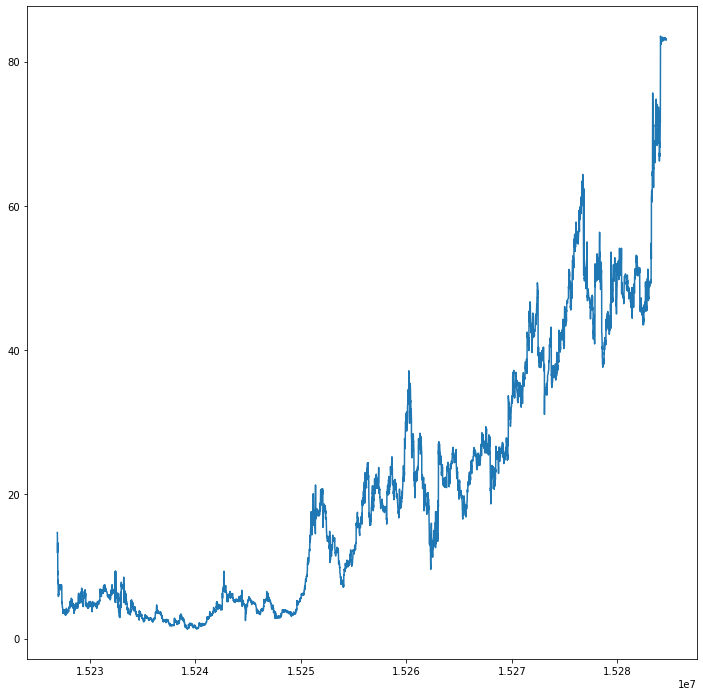

ABC


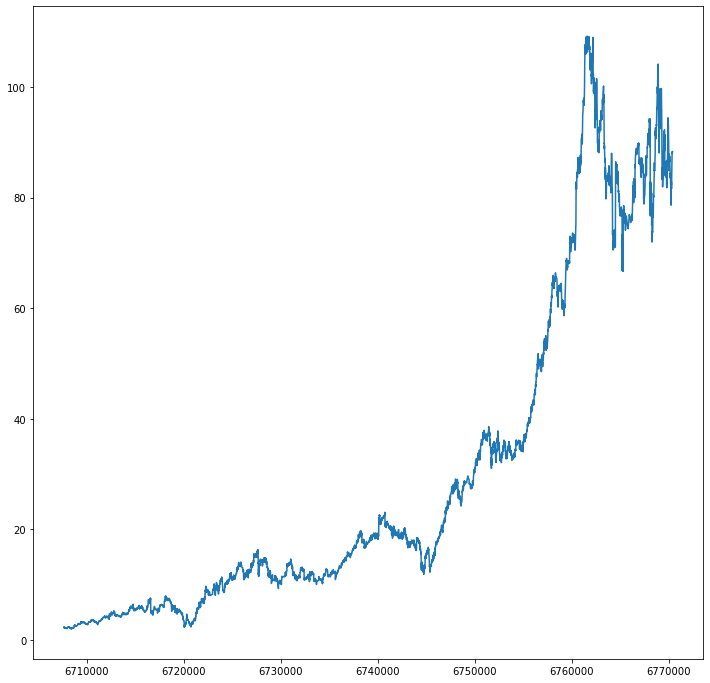

ABM


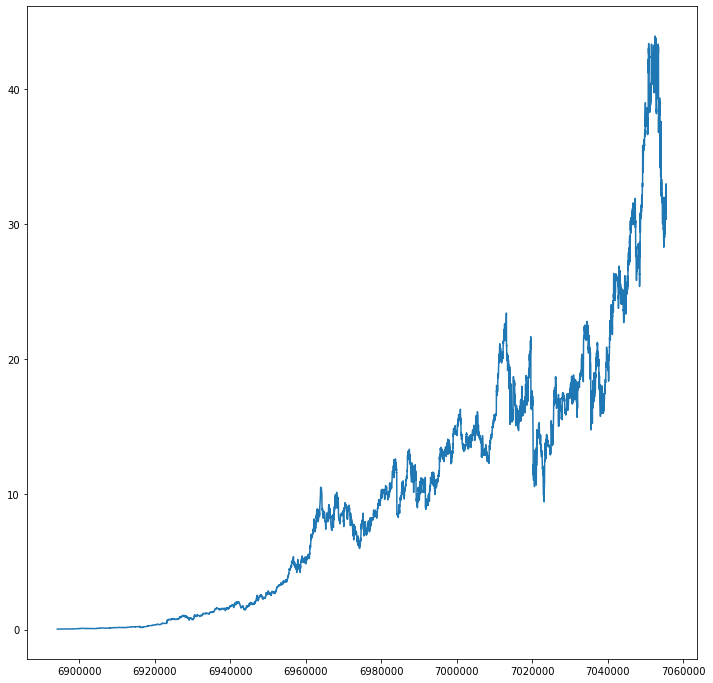

ABX


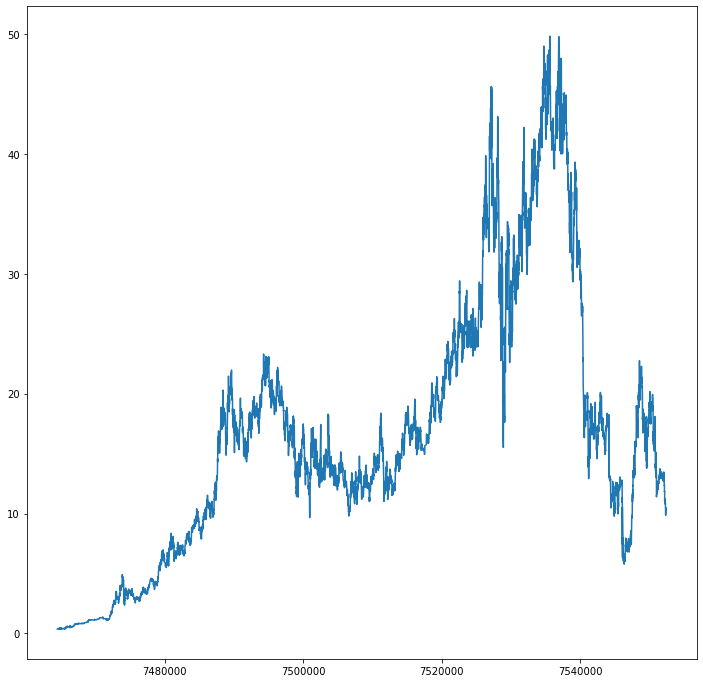

AC


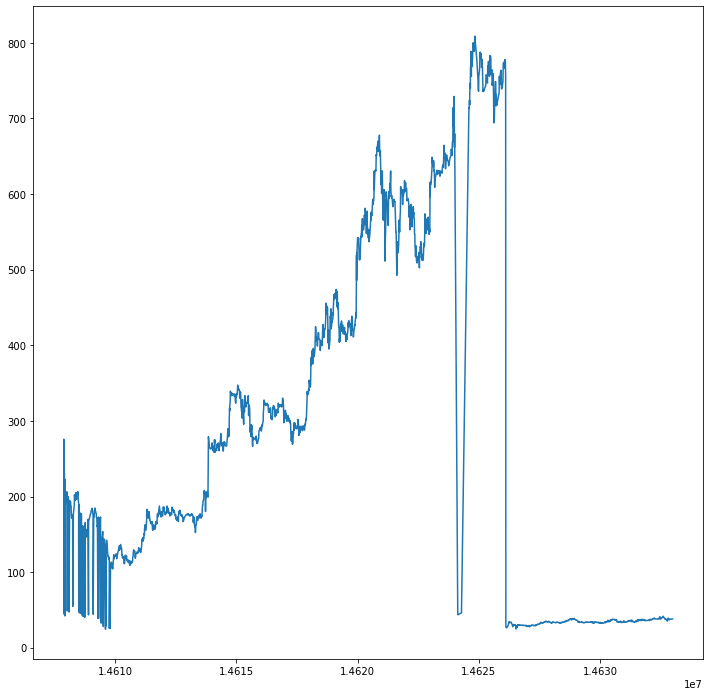

ACAD


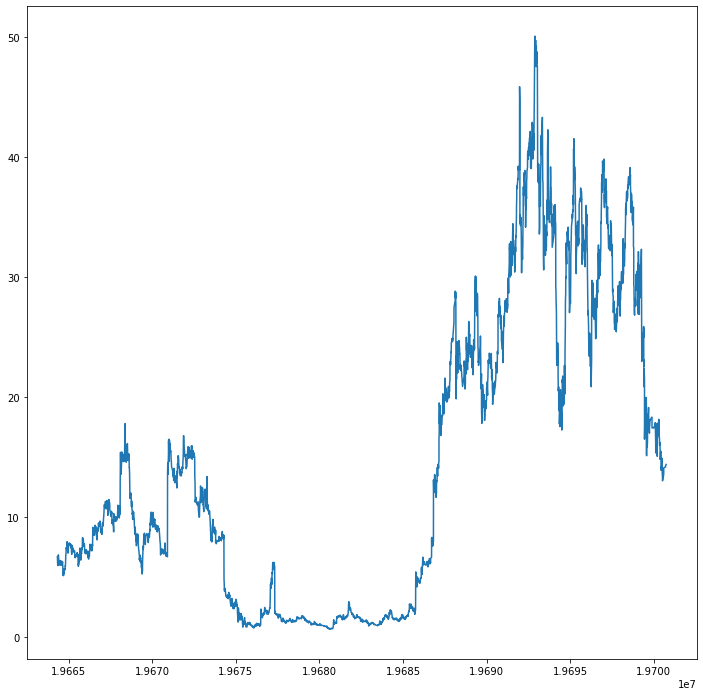

ACGL


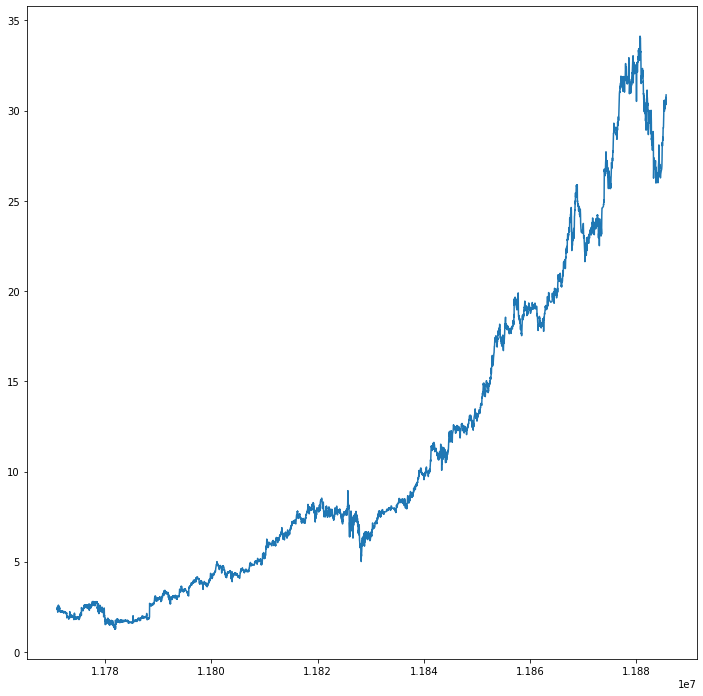

ACHC


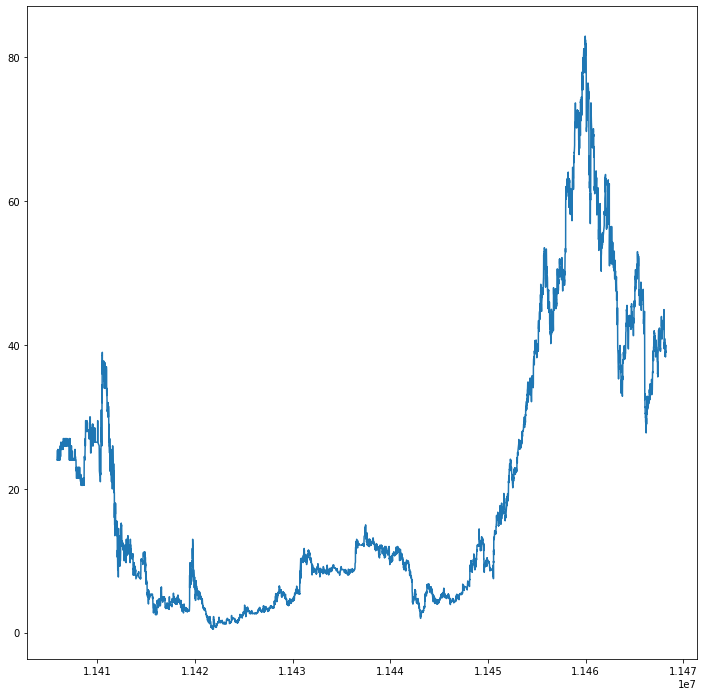

ACHN


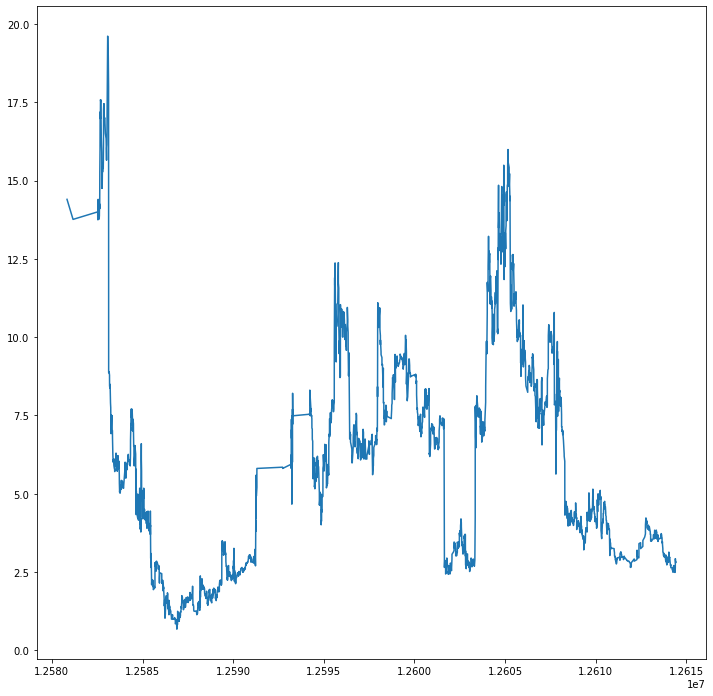

ACOR


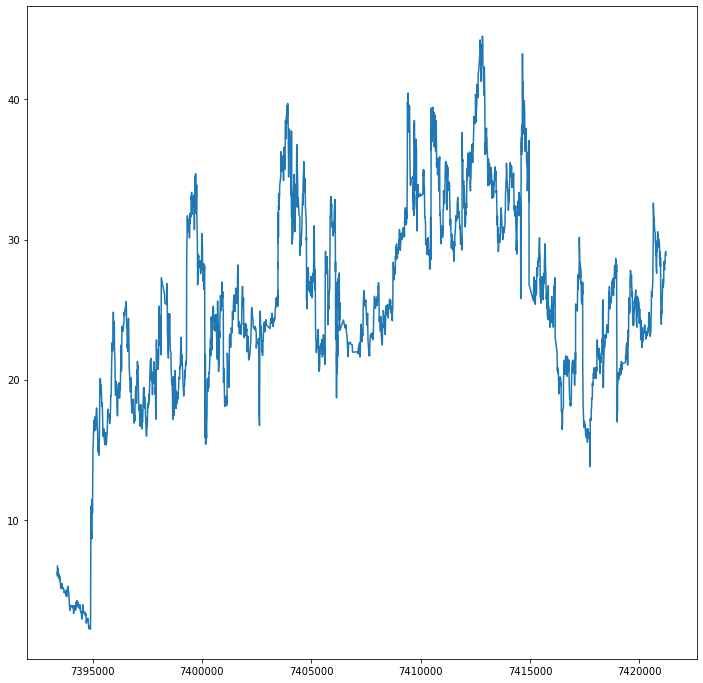

ACRS


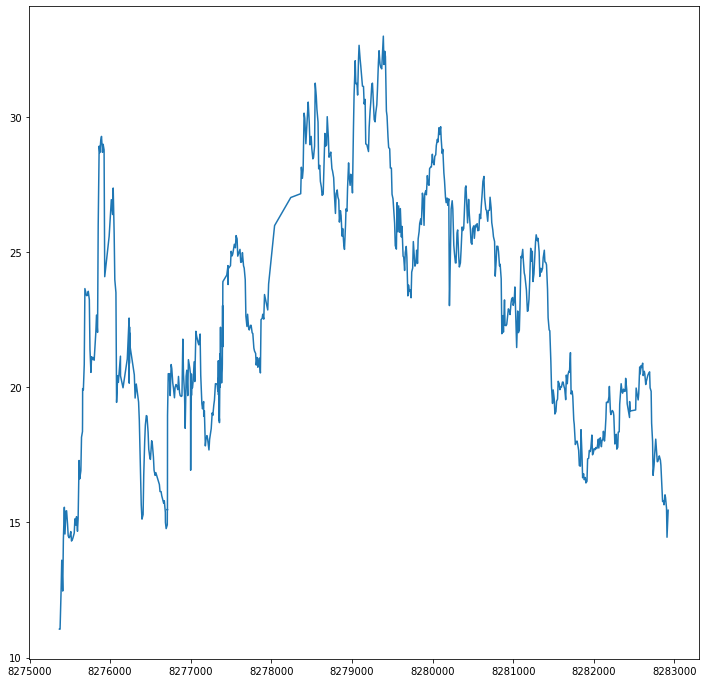

ACRX


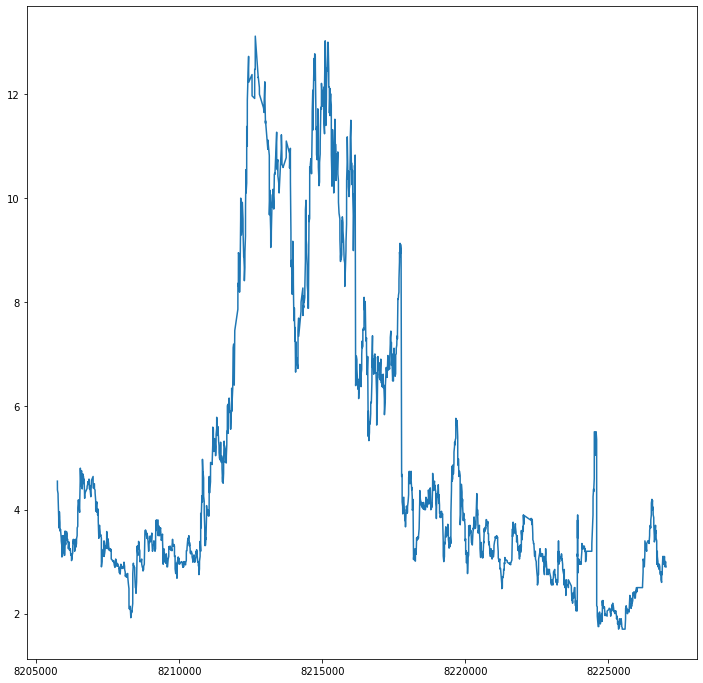

ACSF


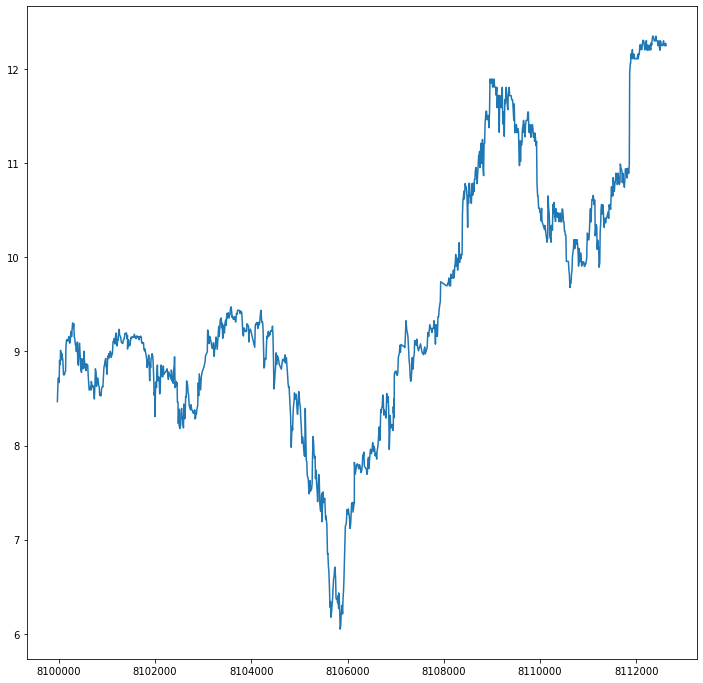

ADOM


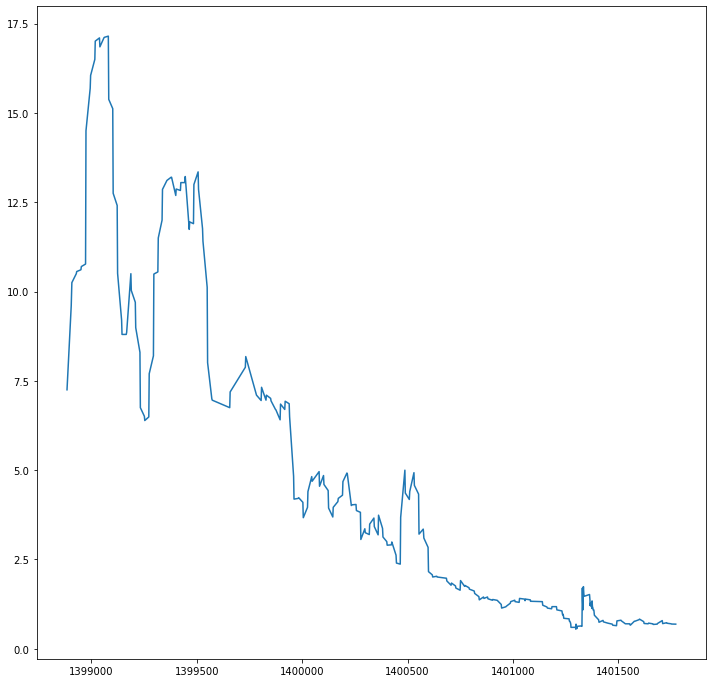

ADRO


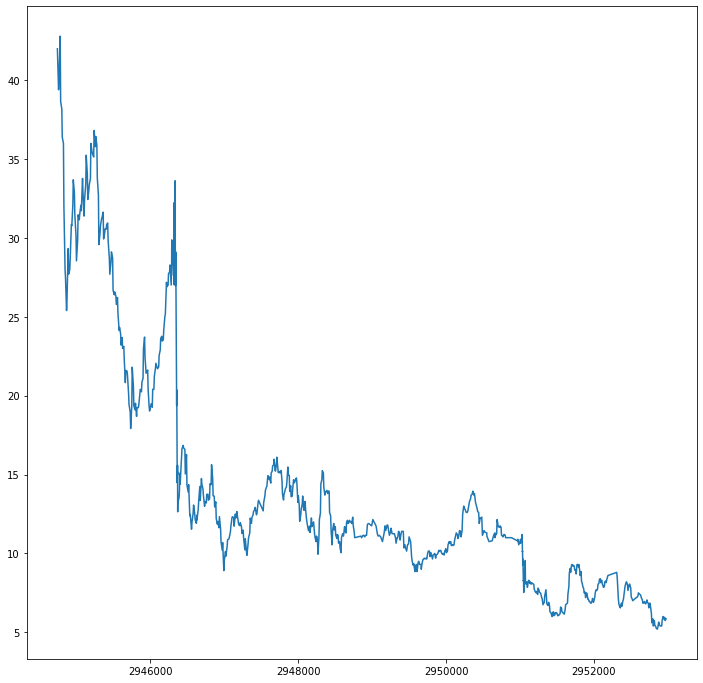

ADS


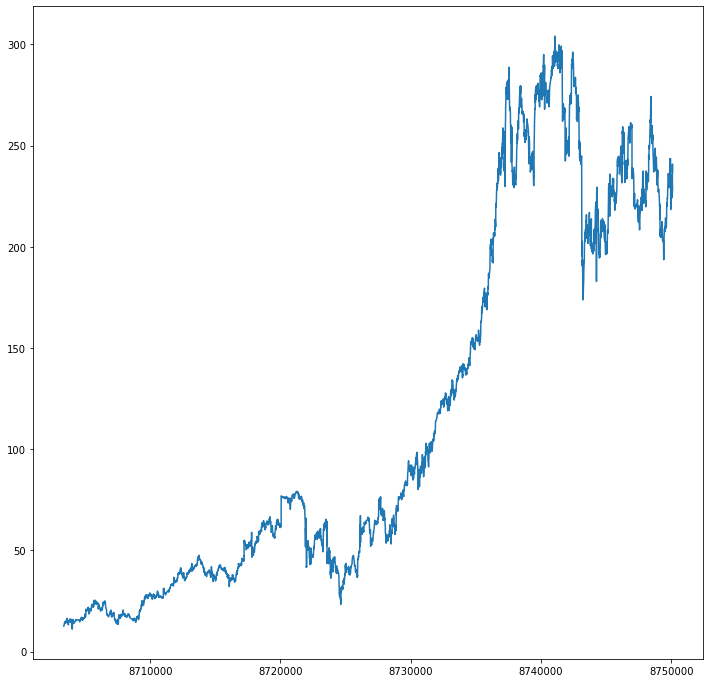

AES


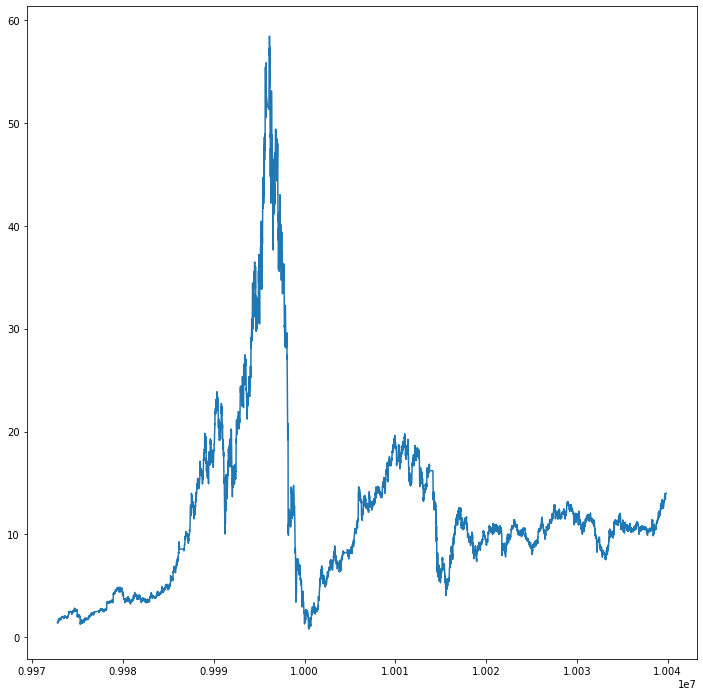

AETI


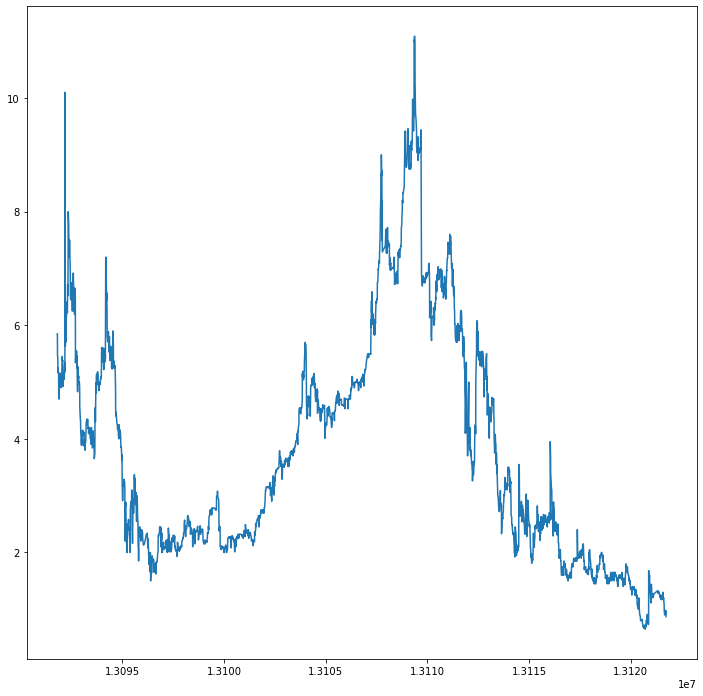

AEY


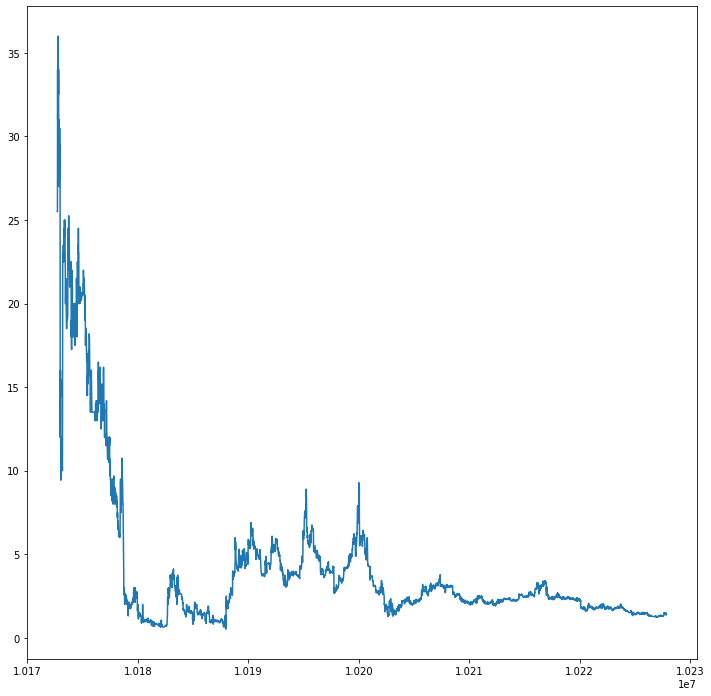

AFMD


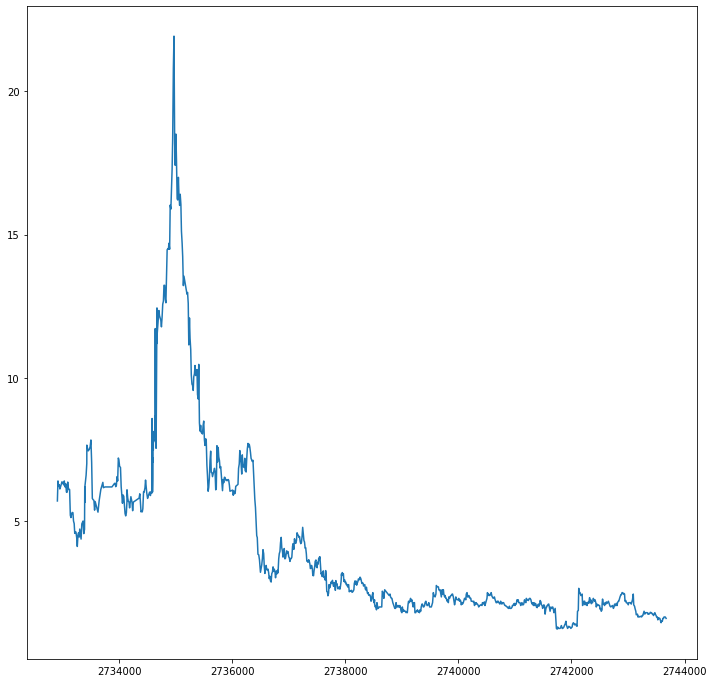

AFT


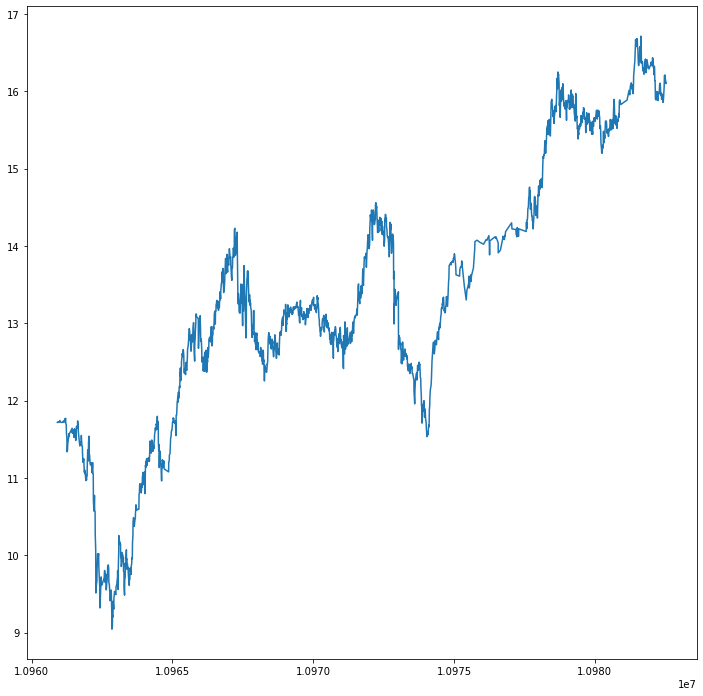

AGI


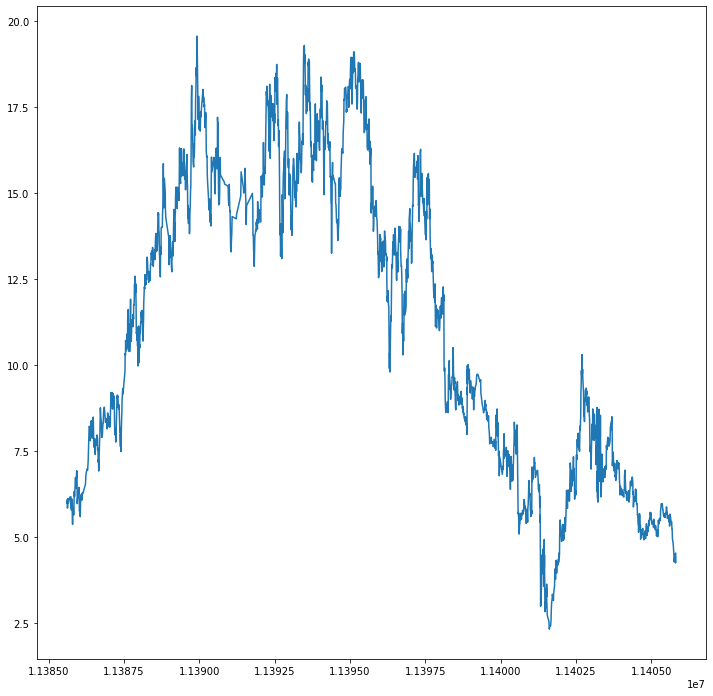

AGLE


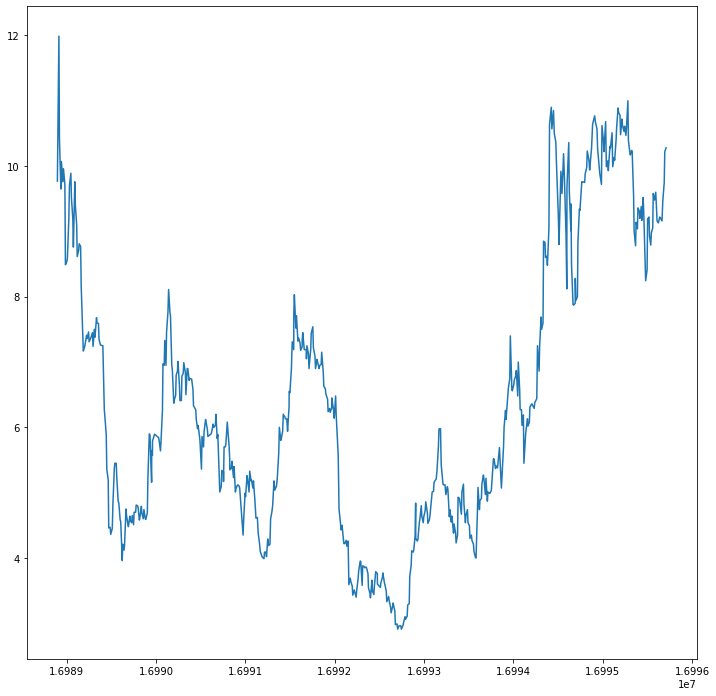

AGO


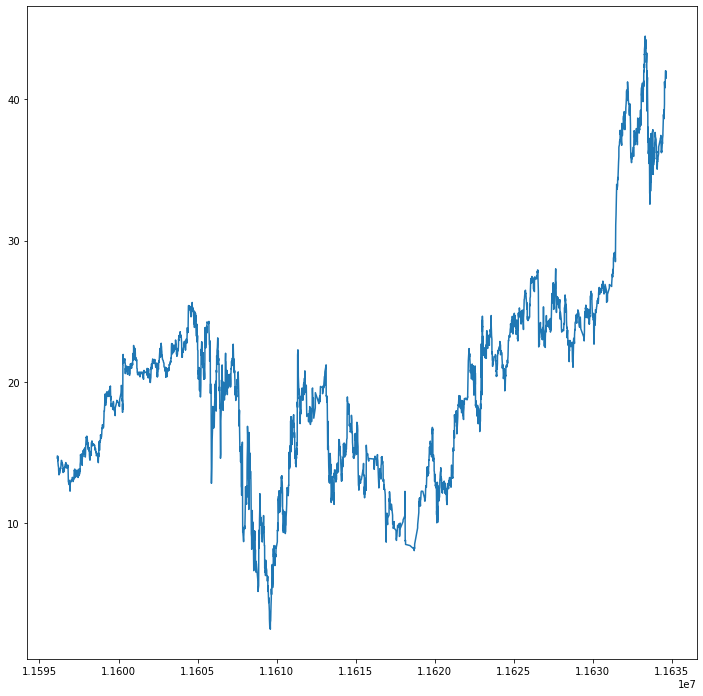

AGRX


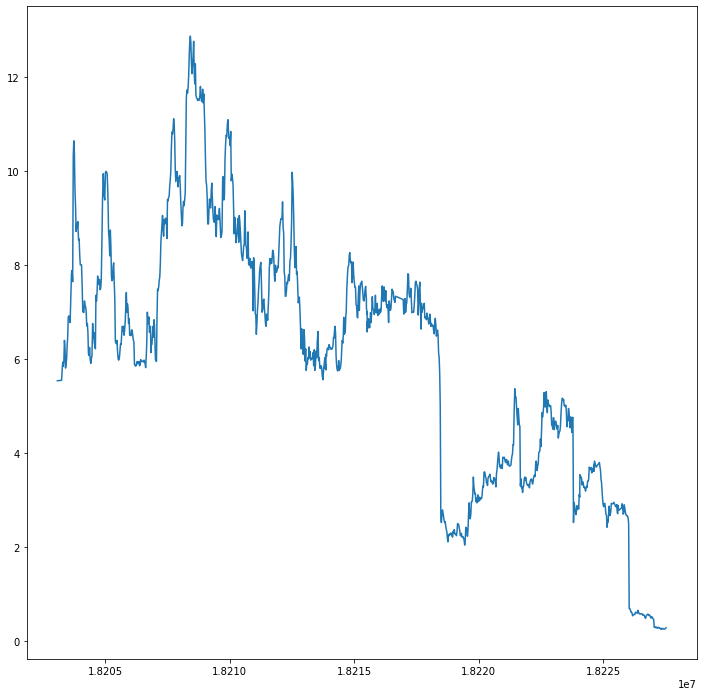

AIZ


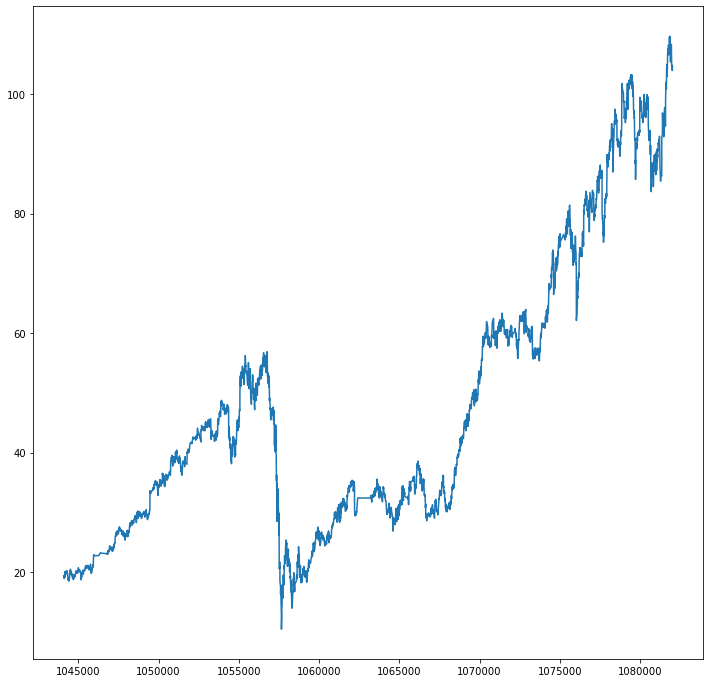

AKAO


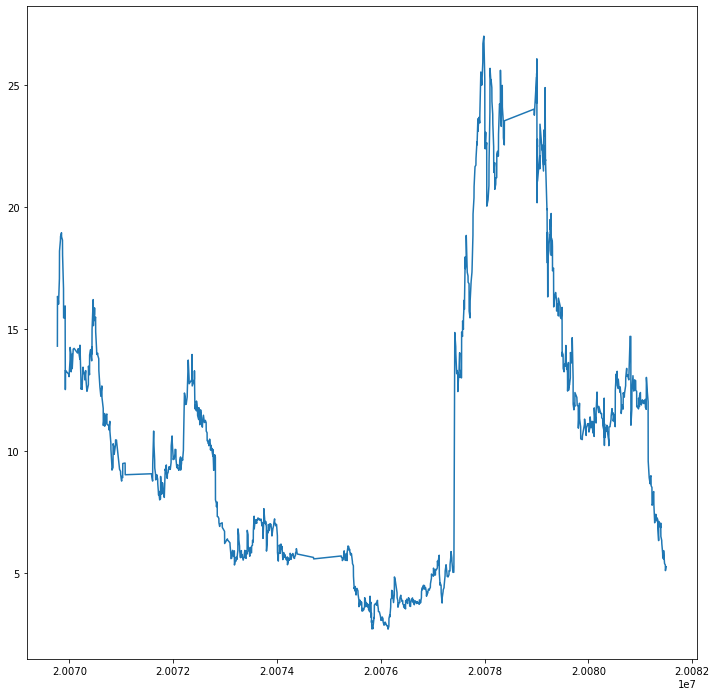

AKTX


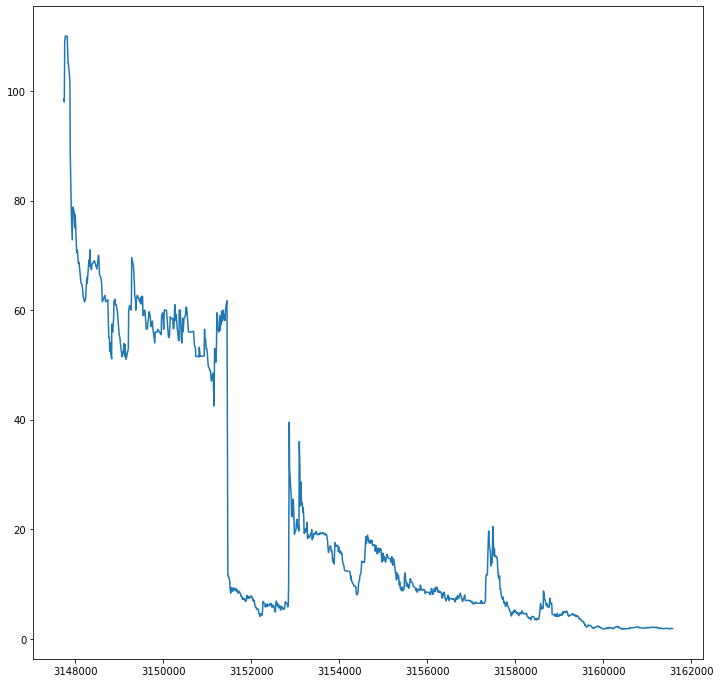

ALNA


KeyboardInterrupt: 

In [396]:
for i in new_clusters[2]:
    print(i)
    historical_stock_prices_df[historical_stock_prices_df["ticker"]==i]["adj_close"].plot()
    plt.show()
    if i==20:
        break